In [ ]:
# all categoriess, keep the TextVectorization.standardize None

In [ ]:
#docker run -it --rm -v c:/workspace/jupyter:/tf -p 8888:8888 tensorflow/tensorflow:latest-gpu-jupyter
#2021-01-05
#!pip install pandas
#!pip install tensorflow_hub
#!pip install tensorflow_text
#!pip install tensorflowjs

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

np.set_printoptions(precision=3, suppress=True) # easy to read read only

from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import json
import re

In [2]:
print("Version: ", tf.__version__)
raw_data = pd.read_csv('data/S_SURVEY_FULL.csv')
# raw_data.head()



Version:  2.4.0


In [3]:
# features / labels / Y
_cat_list = list()
# _min_num = len(raw_data) * .05

# for c in list(raw_data.columns)[1:(len(raw_data.columns)-1)]:
#     if(raw_data[[c]].sum().tolist()[0] > _min_num):
#         _cat_list.append(c)
# expect = raw_data.loc[:, _cat_list]
expect = raw_data[list(raw_data.columns)[1:(len(raw_data.columns)-1)]]
Y = np.array(expect)
feature = np.array(raw_data.loc[:,['JSON']]).reshape(-1)
print(feature.shape,len(_cat_list))

(2543,) 0


In [4]:
# train / text / X
VOCAB_SIZE=400
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    standardize=None,
    max_tokens=VOCAB_SIZE)
ff = np.array([re.sub('[^0-9a-zA-Z_\\.]+', ' ', xx) for xx in feature])
encoder.adapt(ff)
print(np.array(encoder.get_vocabulary()).shape, len(encoder.get_vocabulary()))
print(ff.shape,Y.shape)

(400,) 400
(2543,) (2543, 640)


In [5]:
output_den = len(Y[0]);

model = tf.keras.Sequential()
model.add(encoder)

model.add(tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),mask_zero=True,
                                    output_dim=16))
# model.add(tf.keras.layers.LSTM(64))

model.add(tf.keras.layers.Dense(256, activation='relu'))

# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(output_den, activation='sigmoid'))


# model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x=ff,y=Y,
                    epochs=1,batch_size=512,
                    validation_split=0.01,
                     verbose=1,
#                      callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

5/5 [==============================] - 3s 499ms/step - loss: 0.6923 - accuracy: 0.0000e+00 - val_loss: 0.6887 - val_accuracy: 0.0000e+00


In [8]:
checkpoint_path = "../checkpoint/survey_short_full_v4.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

def plotHistory(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
history = model.fit(x=ff,y=Y,
                    epochs=1,batch_size=512,
                    validation_split=0.1,
                     verbose=1,
                     callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

# plotHistory(history)

In [9]:
history = model.fit(x=ff,y=Y,
                    epochs=800,batch_size=512,
                    validation_split=0.1,
                     verbose=1,
#                      callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

Epoch 1/800
5/5 [==============================] - 1s 288ms/step - loss: 0.1082 - accuracy: 0.0087 - val_loss: 0.2557 - val_accuracy: 0.0039
Epoch 2/800
5/5 [==============================] - 2s 302ms/step - loss: 0.0921 - accuracy: 0.0052 - val_loss: 0.1014 - val_accuracy: 0.0000e+00
Epoch 3/800
5/5 [==============================] - 1s 267ms/step - loss: 0.0774 - accuracy: 0.0057 - val_loss: 0.0755 - val_accuracy: 0.0000e+00
Epoch 4/800
5/5 [==============================] - 1s 256ms/step - loss: 0.0704 - accuracy: 0.0114 - val_loss: 0.0702 - val_accuracy: 0.0431
Epoch 5/800
5/5 [==============================] - 2s 314ms/step - loss: 0.0674 - accuracy: 0.0131 - val_loss: 0.0749 - val_accuracy: 0.0000e+00
Epoch 6/800
5/5 [==============================] - 2s 287ms/step - loss: 0.0648 - accuracy: 0.0144 - val_loss: 0.0904 - val_accuracy: 0.0000e+00
Epoch 7/800
5/5 [==============================] - 1s 283ms/step - loss: 0.0626 - accuracy: 0.0153 - val_loss: 0.1124 - val_accuracy: 0.00

5/5 [==============================] - 1s 259ms/step - loss: 0.0575 - accuracy: 0.0275 - val_loss: 0.0905 - val_accuracy: 0.0000e+00
Epoch 114/800
5/5 [==============================] - 1s 304ms/step - loss: 0.0576 - accuracy: 0.0293 - val_loss: 0.0886 - val_accuracy: 0.0000e+00
Epoch 115/800
5/5 [==============================] - 1s 278ms/step - loss: 0.0576 - accuracy: 0.0284 - val_loss: 0.0905 - val_accuracy: 0.0000e+00
Epoch 116/800
5/5 [==============================] - 1s 251ms/step - loss: 0.0577 - accuracy: 0.0306 - val_loss: 0.0881 - val_accuracy: 0.0000e+00
Epoch 117/800
5/5 [==============================] - 1s 275ms/step - loss: 0.0576 - accuracy: 0.0288 - val_loss: 0.0877 - val_accuracy: 0.0000e+00
Epoch 118/800
5/5 [==============================] - 1s 263ms/step - loss: 0.0576 - accuracy: 0.0288 - val_loss: 0.0843 - val_accuracy: 0.0000e+00
Epoch 119/800
5/5 [==============================] - 1s 288ms/step - loss: 0.0577 - accuracy: 0.0302 - val_loss: 0.0859 - val_accura

Epoch 169/800
5/5 [==============================] - 1s 279ms/step - loss: 0.0569 - accuracy: 0.0319 - val_loss: 0.0914 - val_accuracy: 0.0000e+00
Epoch 170/800
5/5 [==============================] - 1s 295ms/step - loss: 0.0568 - accuracy: 0.0297 - val_loss: 0.0886 - val_accuracy: 0.0000e+00
Epoch 171/800
5/5 [==============================] - 2s 318ms/step - loss: 0.0568 - accuracy: 0.0302 - val_loss: 0.0886 - val_accuracy: 0.0000e+00
Epoch 172/800
5/5 [==============================] - 1s 273ms/step - loss: 0.0567 - accuracy: 0.0306 - val_loss: 0.0868 - val_accuracy: 0.0000e+00
Epoch 173/800
5/5 [==============================] - 1s 279ms/step - loss: 0.0567 - accuracy: 0.0310 - val_loss: 0.0914 - val_accuracy: 0.0000e+00
Epoch 174/800
5/5 [==============================] - 1s 296ms/step - loss: 0.0567 - accuracy: 0.0302 - val_loss: 0.0886 - val_accuracy: 0.0000e+00
Epoch 175/800
5/5 [==============================] - 1s 277ms/step - loss: 0.0567 - accuracy: 0.0288 - val_loss: 0.089

Epoch 225/800
5/5 [==============================] - 1s 278ms/step - loss: 0.0565 - accuracy: 0.0319 - val_loss: 0.0930 - val_accuracy: 0.0000e+00
Epoch 226/800
5/5 [==============================] - 1s 261ms/step - loss: 0.0563 - accuracy: 0.0319 - val_loss: 0.0888 - val_accuracy: 0.0000e+00
Epoch 227/800
5/5 [==============================] - 1s 262ms/step - loss: 0.0562 - accuracy: 0.0323 - val_loss: 0.0843 - val_accuracy: 0.0078
Epoch 228/800
5/5 [==============================] - 1s 281ms/step - loss: 0.0563 - accuracy: 0.0323 - val_loss: 0.0850 - val_accuracy: 0.0000e+00
Epoch 229/800
5/5 [==============================] - 1s 288ms/step - loss: 0.0563 - accuracy: 0.0297 - val_loss: 0.0864 - val_accuracy: 0.0000e+00
Epoch 230/800
5/5 [==============================] - 1s 260ms/step - loss: 0.0562 - accuracy: 0.0310 - val_loss: 0.0852 - val_accuracy: 0.0039
Epoch 231/800
5/5 [==============================] - 1s 273ms/step - loss: 0.0562 - accuracy: 0.0315 - val_loss: 0.0866 - val_

Epoch 281/800
5/5 [==============================] - 1s 260ms/step - loss: 0.0555 - accuracy: 0.0358 - val_loss: 0.0845 - val_accuracy: 0.0000e+00
Epoch 282/800
5/5 [==============================] - 1s 261ms/step - loss: 0.0557 - accuracy: 0.0293 - val_loss: 0.0852 - val_accuracy: 0.0000e+00
Epoch 283/800
5/5 [==============================] - 1s 258ms/step - loss: 0.0555 - accuracy: 0.0323 - val_loss: 0.0876 - val_accuracy: 0.0000e+00
Epoch 284/800
5/5 [==============================] - 1s 257ms/step - loss: 0.0554 - accuracy: 0.0323 - val_loss: 0.0906 - val_accuracy: 0.0000e+00
Epoch 285/800
5/5 [==============================] - 1s 258ms/step - loss: 0.0555 - accuracy: 0.0323 - val_loss: 0.0902 - val_accuracy: 0.0000e+00
Epoch 286/800
5/5 [==============================] - 1s 286ms/step - loss: 0.0554 - accuracy: 0.0328 - val_loss: 0.0908 - val_accuracy: 0.0000e+00
Epoch 287/800
5/5 [==============================] - 1s 278ms/step - loss: 0.0555 - accuracy: 0.0332 - val_loss: 0.090

Epoch 337/800
5/5 [==============================] - 2s 313ms/step - loss: 0.0551 - accuracy: 0.0328 - val_loss: 0.0893 - val_accuracy: 0.0000e+00
Epoch 338/800
5/5 [==============================] - 3s 409ms/step - loss: 0.0549 - accuracy: 0.0332 - val_loss: 0.0878 - val_accuracy: 0.0000e+00
Epoch 339/800
5/5 [==============================] - 1s 258ms/step - loss: 0.0549 - accuracy: 0.0323 - val_loss: 0.0880 - val_accuracy: 0.0000e+00
Epoch 340/800
5/5 [==============================] - 1s 260ms/step - loss: 0.0549 - accuracy: 0.0323 - val_loss: 0.0891 - val_accuracy: 0.0000e+00
Epoch 341/800
5/5 [==============================] - 1s 254ms/step - loss: 0.0549 - accuracy: 0.0323 - val_loss: 0.0880 - val_accuracy: 0.0000e+00
Epoch 342/800
5/5 [==============================] - 1s 278ms/step - loss: 0.0548 - accuracy: 0.0328 - val_loss: 0.0846 - val_accuracy: 0.0000e+00
Epoch 343/800
5/5 [==============================] - 1s 259ms/step - loss: 0.0548 - accuracy: 0.0323 - val_loss: 0.086

Epoch 393/800
5/5 [==============================] - 1s 257ms/step - loss: 0.0545 - accuracy: 0.0341 - val_loss: 0.0875 - val_accuracy: 0.0000e+00
Epoch 394/800
5/5 [==============================] - 2s 270ms/step - loss: 0.0545 - accuracy: 0.0341 - val_loss: 0.0871 - val_accuracy: 0.0078
Epoch 395/800
5/5 [==============================] - 1s 280ms/step - loss: 0.0546 - accuracy: 0.0358 - val_loss: 0.0874 - val_accuracy: 0.0039
Epoch 396/800
5/5 [==============================] - 1s 302ms/step - loss: 0.0545 - accuracy: 0.0358 - val_loss: 0.0874 - val_accuracy: 0.0000e+00
Epoch 397/800
5/5 [==============================] - 1s 272ms/step - loss: 0.0545 - accuracy: 0.0367 - val_loss: 0.0874 - val_accuracy: 0.0000e+00
Epoch 398/800
5/5 [==============================] - 1s 294ms/step - loss: 0.0544 - accuracy: 0.0345 - val_loss: 0.0886 - val_accuracy: 0.0039
Epoch 399/800
5/5 [==============================] - 1s 274ms/step - loss: 0.0545 - accuracy: 0.0332 - val_loss: 0.0907 - val_accu

Epoch 506/800
5/5 [==============================] - 1s 267ms/step - loss: 0.0537 - accuracy: 0.0380 - val_loss: 0.0854 - val_accuracy: 0.0078
Epoch 507/800
5/5 [==============================] - 1s 292ms/step - loss: 0.0537 - accuracy: 0.0402 - val_loss: 0.0840 - val_accuracy: 0.0078
Epoch 508/800
5/5 [==============================] - 1s 266ms/step - loss: 0.0537 - accuracy: 0.0385 - val_loss: 0.0850 - val_accuracy: 0.0078
Epoch 509/800
5/5 [==============================] - 1s 259ms/step - loss: 0.0538 - accuracy: 0.0398 - val_loss: 0.0873 - val_accuracy: 0.0078
Epoch 510/800
5/5 [==============================] - 1s 267ms/step - loss: 0.0537 - accuracy: 0.0406 - val_loss: 0.0867 - val_accuracy: 0.0078
Epoch 511/800
5/5 [==============================] - 2s 292ms/step - loss: 0.0537 - accuracy: 0.0393 - val_loss: 0.0860 - val_accuracy: 0.0078
Epoch 512/800
5/5 [==============================] - 1s 269ms/step - loss: 0.0536 - accuracy: 0.0402 - val_loss: 0.0870 - val_accuracy: 0.0078

5/5 [==============================] - 1s 287ms/step - loss: 0.0530 - accuracy: 0.0411 - val_loss: 0.0869 - val_accuracy: 0.0118
Epoch 621/800
5/5 [==============================] - 2s 381ms/step - loss: 0.0531 - accuracy: 0.0402 - val_loss: 0.0900 - val_accuracy: 0.0078
Epoch 622/800
5/5 [==============================] - 2s 406ms/step - loss: 0.0531 - accuracy: 0.0468 - val_loss: 0.0863 - val_accuracy: 0.0078
Epoch 623/800
5/5 [==============================] - 2s 375ms/step - loss: 0.0531 - accuracy: 0.0428 - val_loss: 0.0854 - val_accuracy: 0.0078
Epoch 624/800
5/5 [==============================] - 2s 335ms/step - loss: 0.0530 - accuracy: 0.0472 - val_loss: 0.0851 - val_accuracy: 0.0078
Epoch 625/800
5/5 [==============================] - 2s 365ms/step - loss: 0.0530 - accuracy: 0.0411 - val_loss: 0.0841 - val_accuracy: 0.0078
Epoch 626/800
5/5 [==============================] - 1s 283ms/step - loss: 0.0530 - accuracy: 0.0437 - val_loss: 0.0903 - val_accuracy: 0.0000e+00
Epoch 627

5/5 [==============================] - 2s 303ms/step - loss: 0.0524 - accuracy: 0.0446 - val_loss: 0.0858 - val_accuracy: 0.0078
Epoch 735/800
5/5 [==============================] - 1s 294ms/step - loss: 0.0523 - accuracy: 0.0428 - val_loss: 0.0834 - val_accuracy: 0.0196
Epoch 736/800
5/5 [==============================] - 1s 266ms/step - loss: 0.0525 - accuracy: 0.0455 - val_loss: 0.0853 - val_accuracy: 0.0078
Epoch 737/800
5/5 [==============================] - 1s 278ms/step - loss: 0.0522 - accuracy: 0.0455 - val_loss: 0.0859 - val_accuracy: 0.0078
Epoch 738/800
5/5 [==============================] - 1s 281ms/step - loss: 0.0523 - accuracy: 0.0446 - val_loss: 0.0866 - val_accuracy: 0.0078
Epoch 739/800
5/5 [==============================] - 2s 298ms/step - loss: 0.0523 - accuracy: 0.0455 - val_loss: 0.0833 - val_accuracy: 0.0196
Epoch 740/800
5/5 [==============================] - 1s 265ms/step - loss: 0.0522 - accuracy: 0.0433 - val_loss: 0.0840 - val_accuracy: 0.0157
Epoch 741/800

80/80 [==============================] - 1s 6ms/step - loss: 0.0549 - accuracy: 0.0397


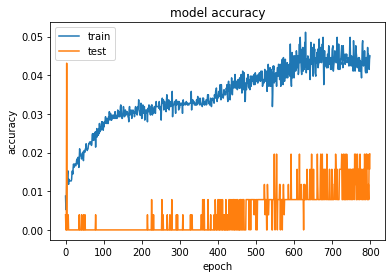

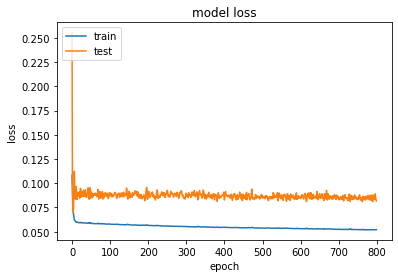

In [10]:
model.evaluate(ff,Y)
plotHistory(history)

In [15]:
# model.load_weights(checkpoint_path)
# model.save_weights(checkpoint_path)
# model.save('../model/survey_short_v4')


INFO:tensorflow:Assets written to: ../model/survey_short_v4/assets


In [12]:
all_predict=model.predict(ff[:])
error_matrix=(np.absolute(Y - all_predict) > .5).astype(int)
_total = error_matrix.sum()
print(_total, len(Y), _total / len(Y), _total / len(Y) / len(Y[0]))
print(np.average(error_matrix.sum(axis=1) / len(Y[0])))

26069 2543 10.251278018088872 0.016017621903263862
0.016017621903263866


In [17]:
full_expect = raw_data[raw_data.columns[1:(len(raw_data.columns)-1)]]
np_pred = (all_predict > 0.5).astype(int)
# full_predict = full_expect.copy()
# for idx, name in enumerate (_cat_list) :
#     full_predict[name] = np_pred[:,idx]
# full_predict = full_predict[full_expect.columns]
full_predict = np_pred
full_error=np.absolute(np.array(full_expect) - np.array(full_predict))
_total = full_error.sum()
print('Wrong:', _total, len(full_error), 'Wrong in row:', _total / len(full_error), _total / len(full_error) / len(full_error[0]))

Wrong: 26069 2543 Wrong in row: 10.251278018088872 0.016017621903263862
